In [ ]:
!pip install seaborn
!pip install seaborn --upgrade
!pip install numpy
!pip install scikit-learn
!pip install pandas
!pip install formulaic
!pip install gapminder

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

from formulaic import Formula, model_matrix
from gapminder import gapminder

In [2]:
import seaborn as sns
import seaborn.objects as so


mpg = sns.load_dataset("mpg")

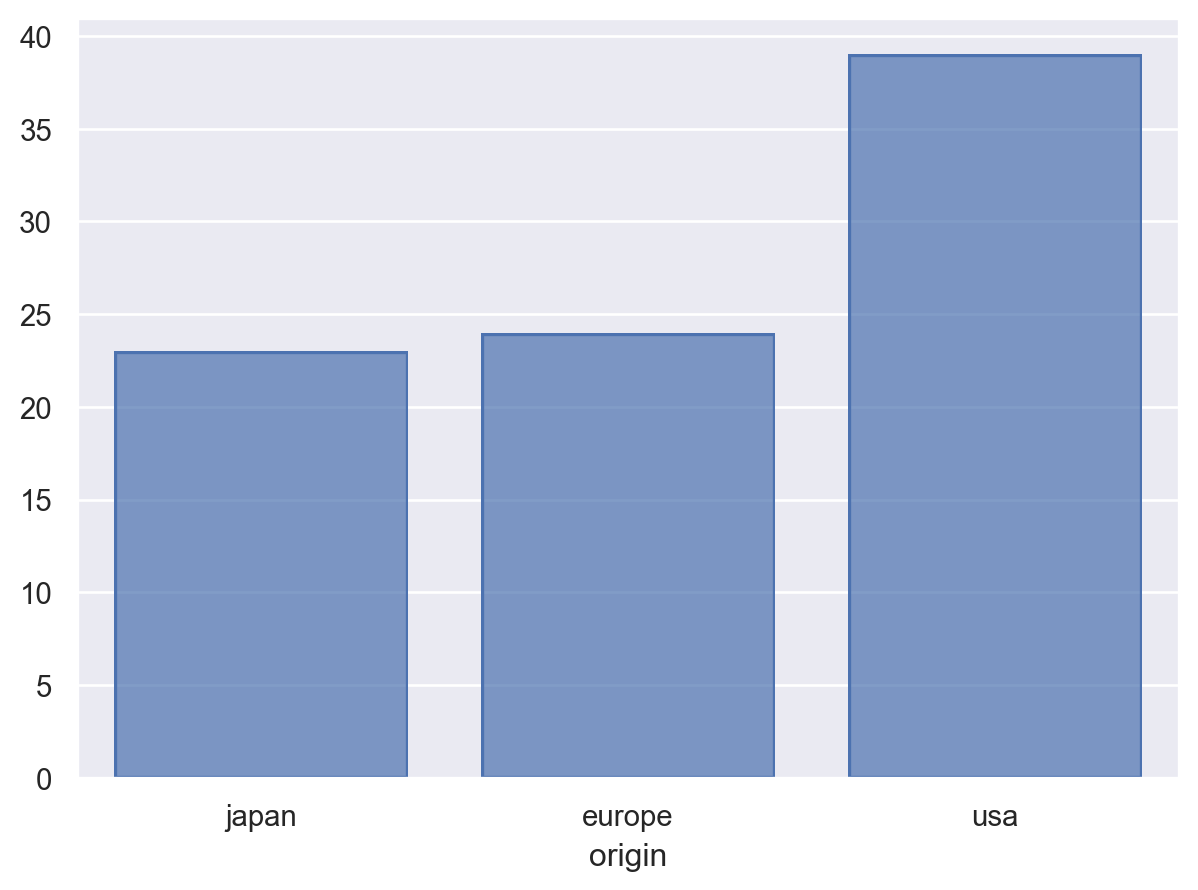

In [16]:
mpgParcial = mpg[(mpg["horsepower"] > 80) & (mpg["cylinders"] == 4)]

(
    so.Plot(data= mpgParcial,x= "origin")
    .add(so.Bar(), so.Hist())
)

In [19]:
import seaborn as sns
import seaborn.objects as so

tips = sns.load_dataset('tips')

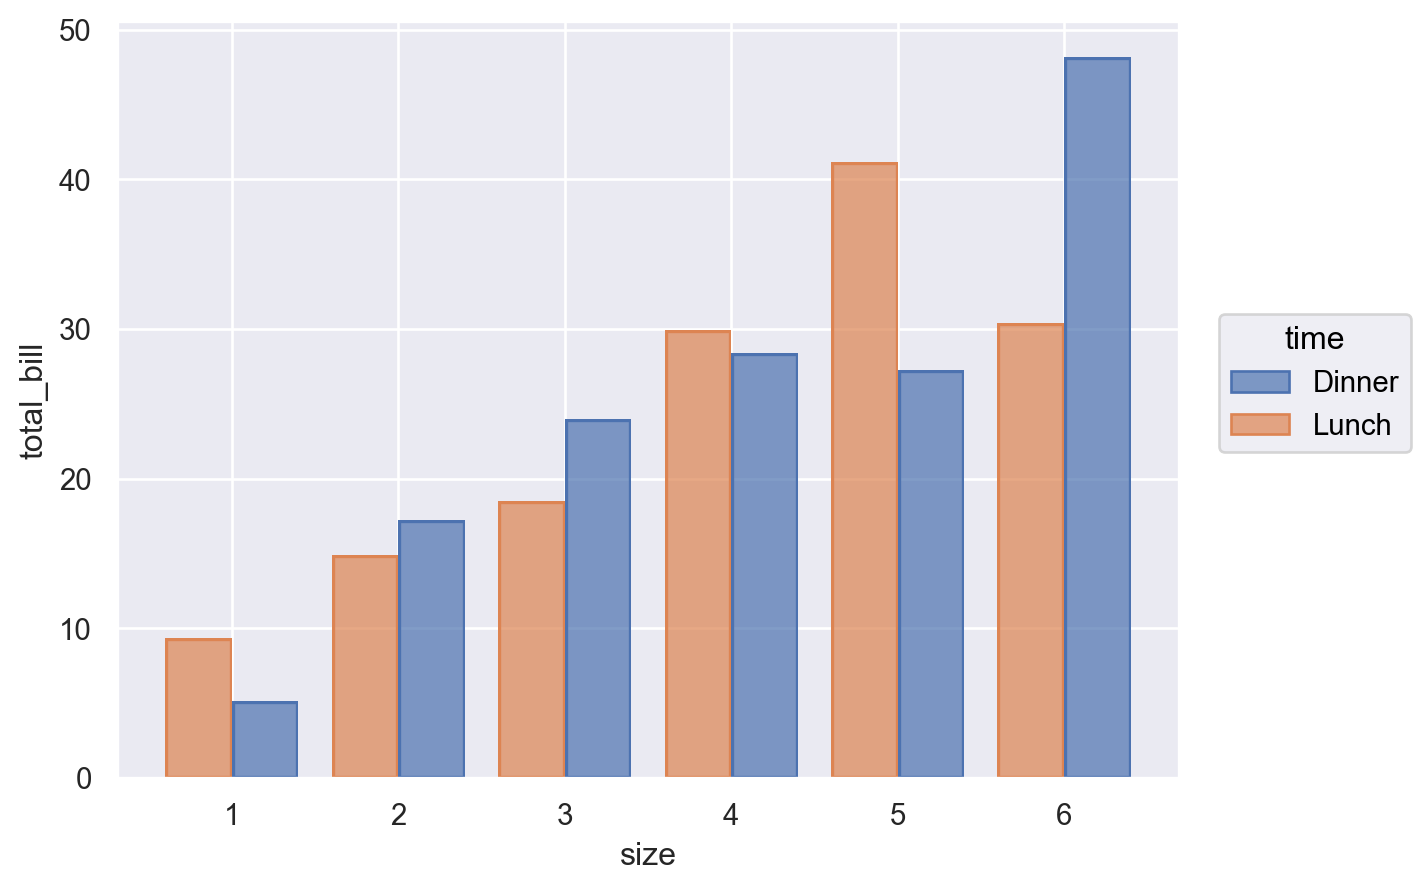

In [21]:
(
    so.Plot(data= tips, x= "size", y= "total_bill", color= "time")
    .add(so.Bar(),so.Agg("mean"),so.Dodge())
)

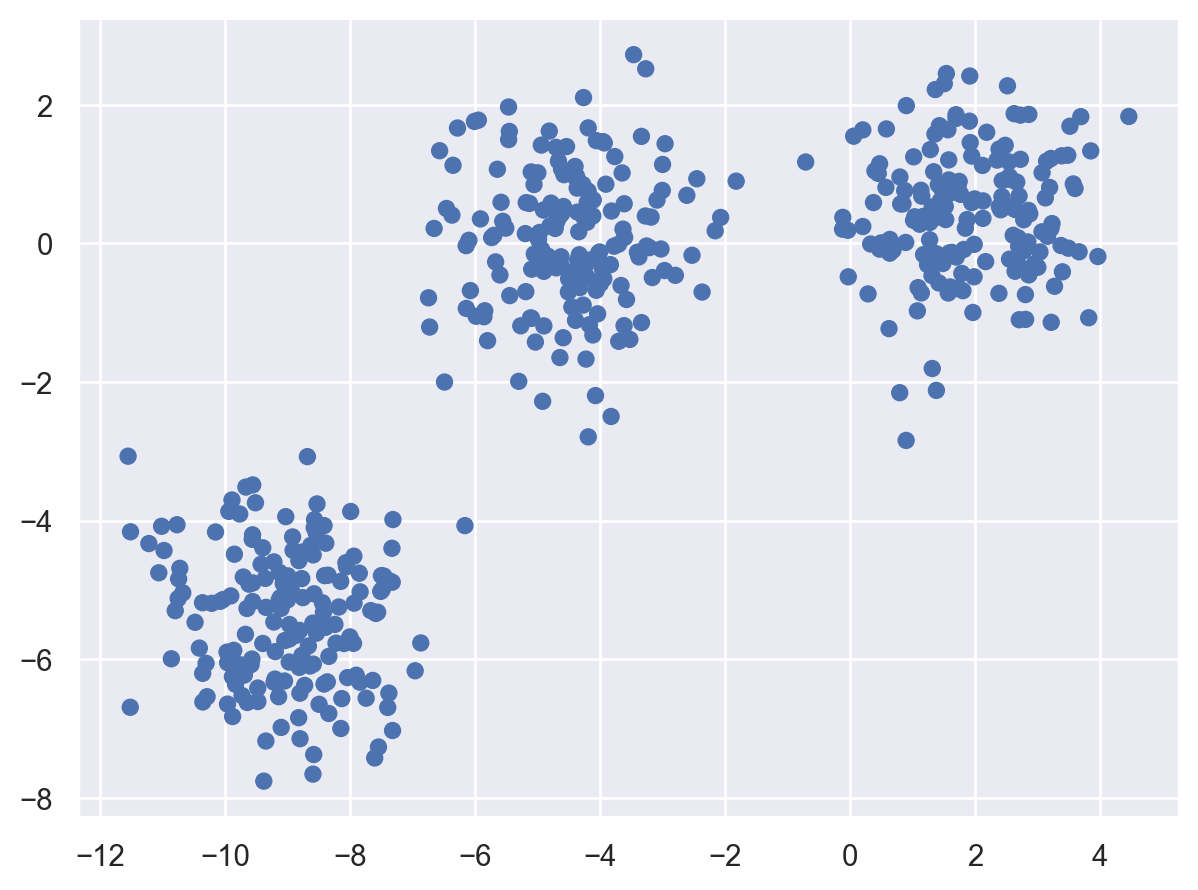

In [22]:
from sklearn.datasets import make_blobs
import numpy as np


X, y = make_blobs(n_samples=500, random_state=170)
so.Plot(x = X[:,0], y = X[:,1]).add(so.Dot())

In [42]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters= 3).fit(X)

df = pd.DataFrame(X, columns=["x", "y"])

df["cluster"] = clustering.predict(X).astype(str)

centroides = pd.DataFrame(clustering.cluster_centers_, columns=["x", "y"])


c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


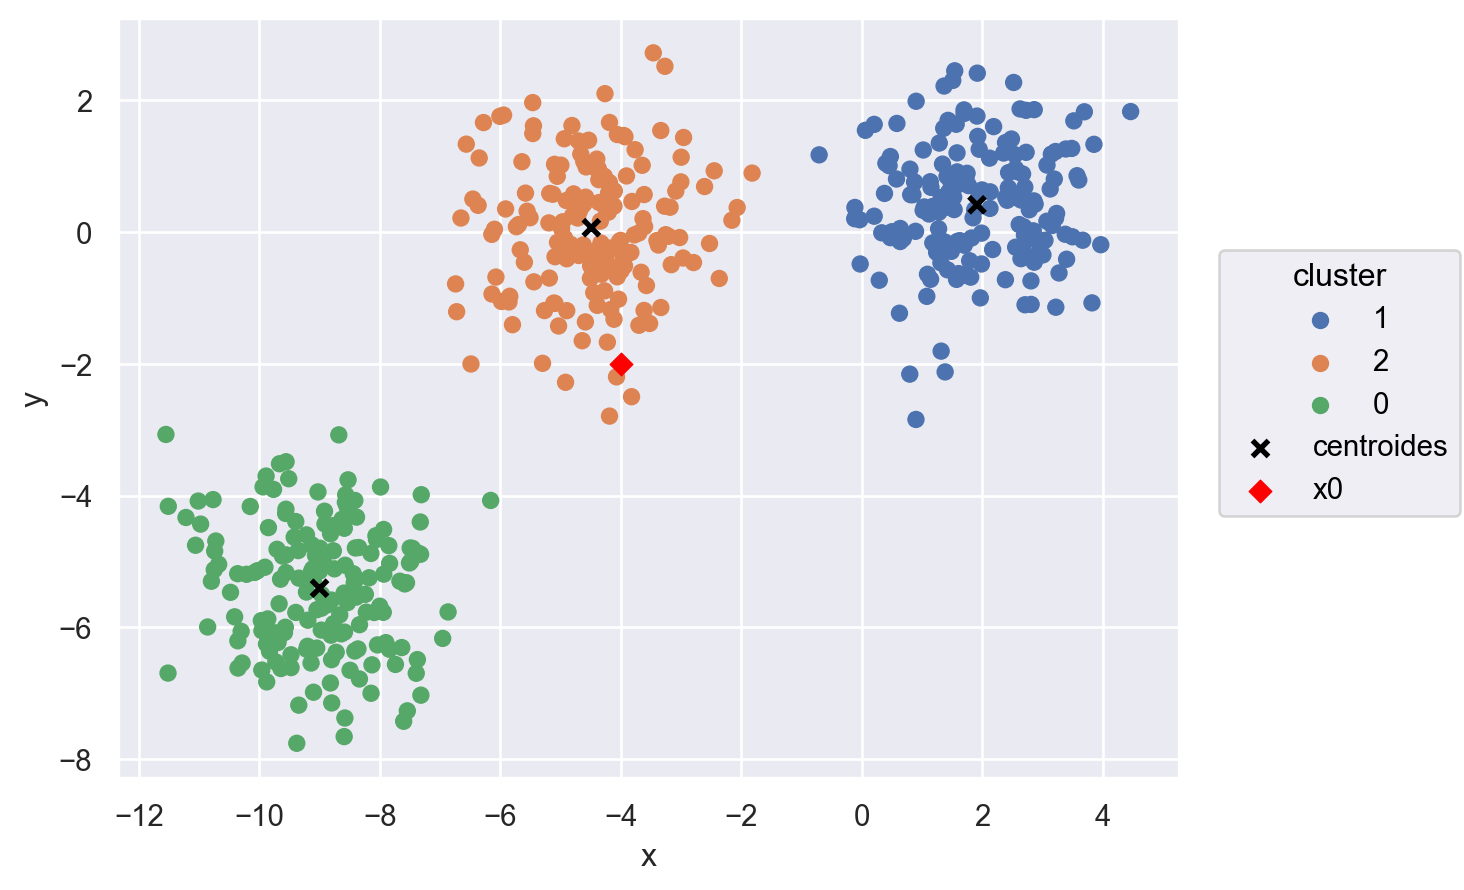

In [45]:
(
    so.Plot()
    .add(so.Dot(), x= "x",y="y",color="cluster", data=df)
    .add(so.Dot(color = "black",marker="x",stroke=2), x="x", y="y",data=centroides,label="centroides")
    .add(so.Dot(color="red", marker="D"), x=[-4], y=[-2], label="x0")

)

In [66]:
x0 = [-4, -2]
x0 = np.array(x0)
x0 = x0.reshape(1, -1)
pred = clustering.predict(x0)[0]
centroides.loc[pred]

x   -4.490306
y    0.066961
Name: 2, dtype: float64

A partir de los datos de Gapminder se quiere calcular el desvío estándar de los valores de todos los países de gdpPercap / lifeExp en el año 2002.

¿Cuál es el código para hacerlo y cuál es el valor del desvío estándar?

In [46]:
from gapminder import gapminder


In [52]:
gap_2002 = gapminder[gapminder["year"] == 2002]

gdp_2002 = gap_2002["gdpPercap"]

lifeExp_2002 = gap_2002["lifeExp"]

GDP = gdp_2002 / lifeExp_2002

GDP.std()

139.42731935580798

In [67]:
import seaborn as sns


tips = sns.load_dataset('tips')

A partir del DataFrame tips, dar un código de una sola línea para eliminar las filas con datos faltantes, eliminar la columna smoker y renombrar las columnas total_bill y tip a valor y propina, respectivamente.

In [69]:
tipsClean = tips.dropna().drop(columns="smoker").rename(columns={"total_bill": "valor", "tip" : "propina"})
tipsClean

,valor,propina,sex,day,time,size
0,16.99,1.01,Female,Sun,Dinner,2
1,10.34,1.66,Male,Sun,Dinner,3
2,21.01,3.50,Male,Sun,Dinner,3
3,23.68,3.31,Male,Sun,Dinner,2
4,24.59,3.61,Female,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Male,Sat,Dinner,3
240,27.18,2.00,Female,Sat,Dinner,2
241,22.67,2.00,Male,Sat,Dinner,2
242,17.82,1.75,Male,Sat,Dinner,2


Es cuestión de realizar la cuenta adecuada: 𝑧0 = (𝑥0 − 𝜇) × 𝑈, donde 𝑈 es la matriz de 4 × 2 que
tiene por columnas a los vectores 𝑢1
, 𝑢2
.

In [84]:
x0 =  np.array([0.4, 0, 0.9, 1.4])

u = np.array([0.5, 0.2, 0.6, 0.8])

u_1 = (0.45, 0, 0, 0.89) 
u_2 = (0, 1, 0, 0) 

U = np.array([[0.45,0],[0,1],[0,0],[0.89,0]])

z0 = (x0 - u)

z01 = np.dot(z0,U)
z01

array([ 0.489, -0.2  ])

In [86]:
lambdas = [11,9,5,4,3]

porcentaje = 0

total = 11+9+5+4+3

for valor in lambdas:

    porcentaje += valor / total
    print (porcentaje)

0.34375
0.625
0.78125
0.90625
1.0


In [3]:
import seaborn as sns


tips = sns.load_dataset('tips')

dias = {"Sun" : "Domingo", "Sat" : "Sabado", "Thur" : "Jueves", "Fri" : "Viernes"}

tips["day"] = tips.day.map(dias)

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Domingo,Dinner,2
1,10.34,1.66,Male,No,Domingo,Dinner,3
2,21.01,3.50,Male,No,Domingo,Dinner,3
3,23.68,3.31,Male,No,Domingo,Dinner,2
4,24.59,3.61,Female,No,Domingo,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sabado,Dinner,3
240,27.18,2.00,Female,Yes,Sabado,Dinner,2
241,22.67,2.00,Male,Yes,Sabado,Dinner,2
242,17.82,1.75,Male,No,Sabado,Dinner,2


In [102]:
import seaborn as sns


tips = sns.load_dataset('tips')

Ingresar un código para agregarle al dataset tips una columna llamada day_std con el desvio estandar de las propinas (tip) del día (day).

In [121]:
days = tips.groupby("day")["tip"]
days_std = days.std()
days_std

day
Thur    1.240223
Fri     1.019577
Sat     1.631014
Sun     1.234880
Name: tip, dtype: float64

In [127]:
tips["day_std"] = tips.groupby("day").tip.transform("std")

tips


,total_bill,tip,sex,smoker,day,time,size,day_std
0,16.99,1.01,Female,No,Sun,Dinner,2,1.234880
1,10.34,1.66,Male,No,Sun,Dinner,3,1.234880
2,21.01,3.50,Male,No,Sun,Dinner,3,1.234880
3,23.68,3.31,Male,No,Sun,Dinner,2,1.234880
4,24.59,3.61,Female,No,Sun,Dinner,4,1.234880
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.631014
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.631014
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.631014
242,17.82,1.75,Male,No,Sat,Dinner,2,1.631014


In [128]:
import seaborn as sns


tips = sns.load_dataset('tips')

Ingresar un código para agregarle al dataset tips una columna tip_ratio que muestre la proporcion de la propina (tip) respecto de lo que costó la comida (total_bill) y otra columna large_ratio que indique si la propina fue mayor que el 10% del valor de la comida (1 en caso afirmativo, 0 en caso negativo)

In [132]:
tips["tip_ratio"] = tips.tip / tips.total_bill
tips["large_ratio"] = (tips.tip_ratio > 0.1).astype(int)

tips

,total_bill,tip,sex,smoker,day,time,size,tip_ratio,large_ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,0


41

In [135]:
2*4

8